In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
import numpy as np
import pandas as pd
import joblib
import sys
sys.path.append('../lib')
from utils import edf_loader, combiner, annotations_reader, find_breakpoints, find_sections,\
                    section_seiz, find_edf
from transformers import SpectrogramTransformer
from models import Baseline, PostProcessing
import time

# Get a signal

In [5]:
files1 = find_edf('../dataset/edf/train/01_tcp_ar/')
files2 = find_edf('../dataset/edf/train/02_tcp_le/')
files3 = find_edf('../dataset/edf/train/03_tcp_ar_a/')
files = [files1, files2, files3]

In [13]:
id_file = 0
file = files1[id_file]
raw = edf_loader(file)
raw.info['montage_type'] = 1
tmax = raw.n_times/raw.info['sfreq']
wd = 8
S = SpectrogramTransformer(win_duration=wd)
montages, spectrograms_db_list = S.fit_transform(raw)
sig = montages[0]

In [14]:
len(sig)

20000

# Apply filter

In [35]:
from scipy import signal
bandWidth = 4
filt = signal.butter(5,[60 - bandWidth//2, 60 + bandWidth//2], btype='bandstop', analog=False, output='sos', fs=200)

In [16]:
filtered = signal.sosfilt(filt, sig)

In [36]:
len(filt)

5

In [47]:
b,a = signal.butter(4,[60 - bandWidth//2, 60 + bandWidth//2],btype='bandstop',analog=True)
w,h = signal.freqs(b,a)

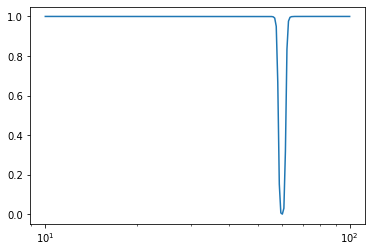

In [51]:
plt.semilogx(w,abs(h))

# Visualize

In [17]:
from matplotlib import pyplot as plt

In [19]:
F_before = spectrograms_db_list[0][2]

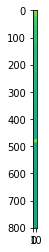

In [23]:
plt.imshow(F_before)

In [29]:
f,t,Sxx = signal.spectrogram(filtered,
                                         fs=S.fs,
                                         window=S.window,
                                         nperseg=S.nperseg,
                                         noverlap=S.noverlap,
                                         nfft=S.nfft,
                                         detrend=S.detrend,
                                         return_onesided=S.return_onesided,
                                         scaling=S.scaling,
                                         axis=S.axis,
                                         mode=S.mode)
F_after = 10*np.log10(Sxx)

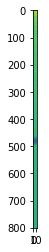

In [30]:
plt.imshow(F_after)

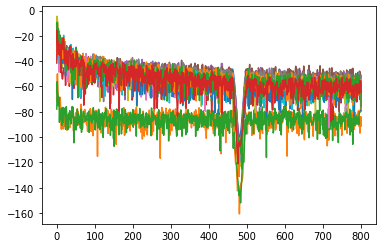

In [31]:
plt.plot(F_after)